In [6]:
import pandas as pd

import torch
from timm.data.mixup import Mixup
from iris.data import LandMarkDataset
from torch.utils.data import DataLoader

import torchvision
import numpy as np
from matplotlib import pyplot as plt

In [2]:
annotations_file = pd.read_csv("../img_metadata_train_dev.csv")

def get_dataset_and_loader(mixup_args):
    mixup_fn = Mixup(**mixup_args)
    lm_dataset = LandMarkDataset("../dataset/train", annotations_file)
    loader = DataLoader(lm_dataset, batch_size=8, shuffle=True)
    return mixup_fn, lm_dataset, loader


In [8]:
mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 0.,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 1000}


In [22]:
mixup_fn, dataset, loader = get_dataset_and_loader(mixup_args)
features, labels = next(iter(loader))
features.shape

torch.Size([8, 3, 400, 600])

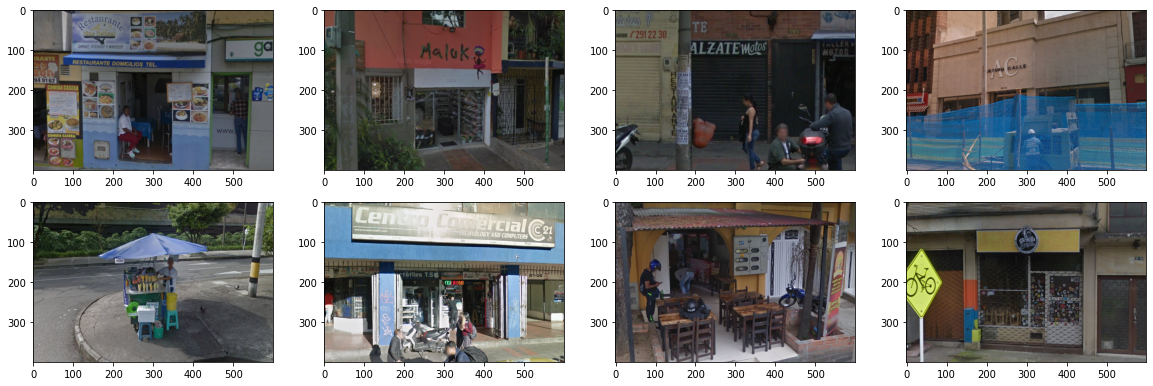

In [39]:
plt.figure(figsize=(20, 10))
columns = 4
rows = int(len(features) / columns + 1)
for i, image in enumerate(features):
    image = transforms.ToPILImage()(image).convert("RGB")
    plt.subplot(rows, columns, i + 1)
    plt.imshow(image)


In [ ]:
features, labels = mixup_fn(features, labels)